<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_MACHINE_LEARNING_SEMESTER3/blob/main/praktikum_mandiri3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/drive/MyDrive/Praktikum Mandiri 3/data'

In [ ]:
import pandas as pd
df = pd.read_csv(path + '/day.csv')
display(df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
columns_drop = ['instant', 'dteday', 'casual', 'registered']
df_clean = df.drop(columns_drop, axis=1)
df_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


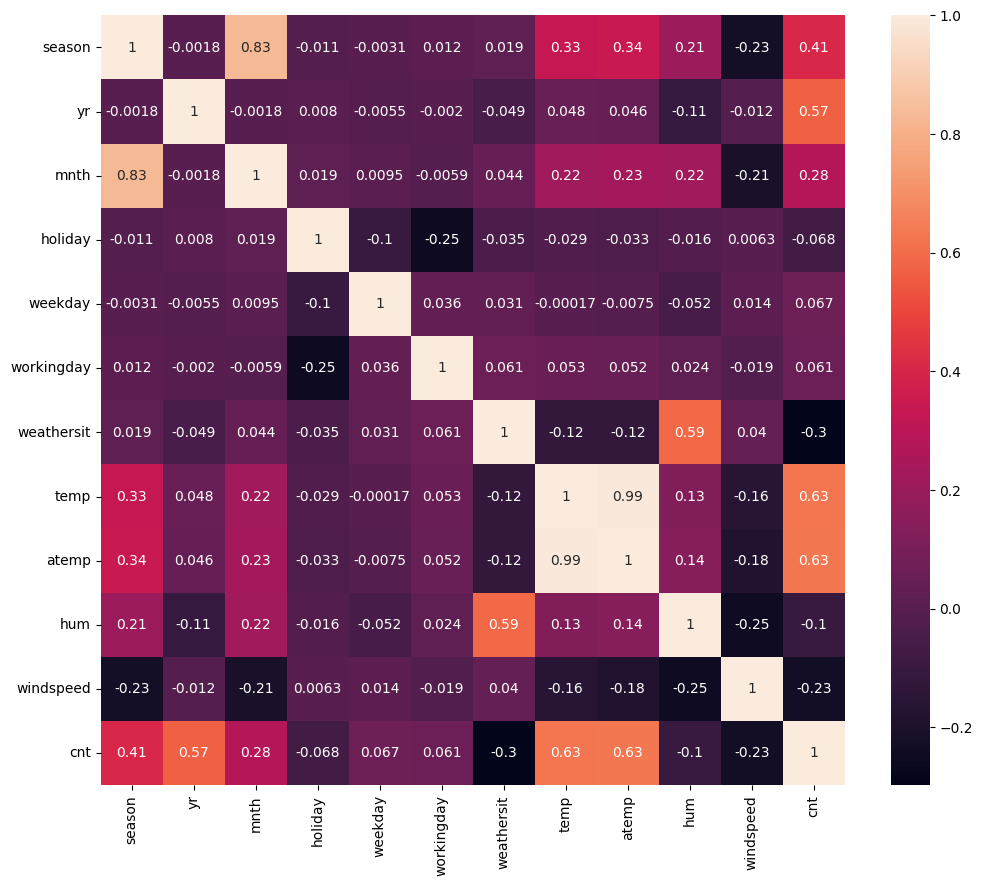

In [ ]:
import seaborn as snb
import matplotlib.pyplot as plt
correlation = df_clean.corr()
plt.figure(figsize=(12, 10))
snb.heatmap(correlation, annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
fitur = ['yr', 'temp', 'season', 'weathersit' ]
X = df_clean[fitur]
y = df_clean['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran data train: {X_train.shape}")
print(f"Ukuran data test: {X_test.shape}")

Ukuran data train: (584, 4)
Ukuran data test: (147, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np


model = LinearRegression()
model.fit(X_train, y_train)
print("Model berhasil dilatih")

Model berhasil dilatih


In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Nilai MAE: {mae}")
print(f"Nilai R2: {r2}")
print(f"Nilai MSE: {mse}")
print(f"Nilai RMSE: {rmse}")

Nilai MAE: 680.5681734300882
Nilai R2: 0.7961949146422715
Nilai MSE: 817234.4020991959
Nilai RMSE: 904.0101780949127


In [ ]:
slope = model.coef_[0]
intercept = model.intercept_

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Koefisien:")
print(coeff_df)
print(f"Nilai slope: {slope}")
print(f"Nilai intercept: {intercept}")
print(f"Persamaan: ")
equation = f"y = {intercept:.2f}"
for feature, coef in zip(X.columns, model.coef_):
    equation += f" + {coef:.2f} * {feature}"
print(equation)

Koefisien:
            Coefficient
yr          2034.201857
temp        5236.314069
season       437.934676
weathersit  -768.792096
Nilai slope: 2034.201857285265
Nilai intercept: 873.3078736548505
Persamaan: 
y = 873.31 + 2034.20 * yr + 5236.31 * temp + 437.93 * season + -768.79 * weathersit


Membuat plot regresi...


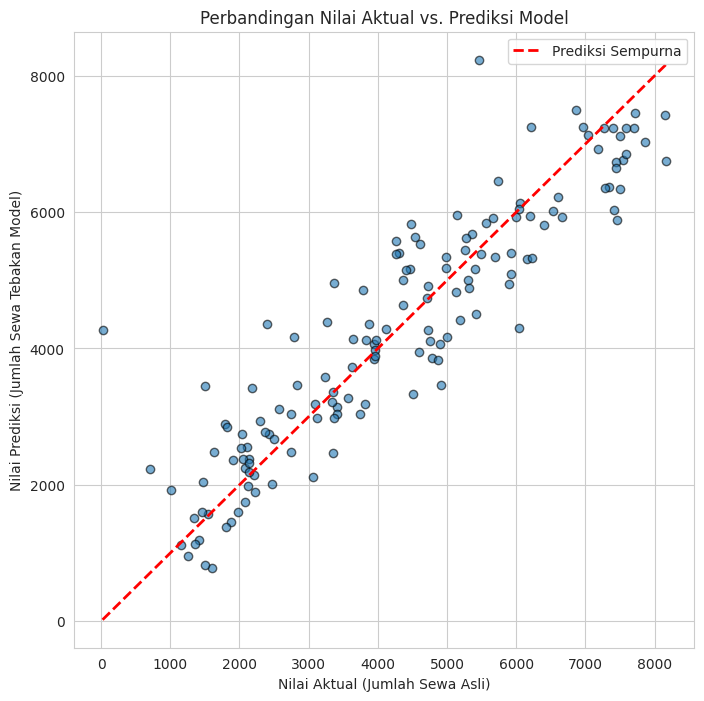

In [ ]:
print("Membuat plot regresi...")

# Mengatur style plot agar terlihat lebih menarik
snb.set_style("whitegrid")

# Membuat scatter plot antara nilai aktual (y_test) dan prediksi (y_pred)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')

# Membuat garis diagonal (garis prediksi sempurna)
# Ini adalah garis di mana y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Prediksi Sempurna')

# Menambahkan label dan judul
plt.xlabel("Nilai Aktual (Jumlah Sewa Asli)")
plt.ylabel("Nilai Prediksi (Jumlah Sewa Tebakan Model)")
plt.title("Perbandingan Nilai Aktual vs. Prediksi Model")
plt.legend()
plt.show()

In [ ]:
hasil = pd.DataFrame()
hasil['Sewa Asli'] = y_test
hasil['Sewa Tebakan'] = y_pred.astype(int)
hasil['Selisih Error'] = hasil['Sewa Asli'] - hasil['Sewa Tebakan']
hasil['Akurasi %'] = 100 * (1 - abs(hasil['Selisih Error'] / hasil['Sewa Asli']))
hasil['Akurasi %'] = hasil['Akurasi %'].clip(lower=0)


pd.options.display.float_format = '{:.2f}'.format

print("Hasil Prediksi")
print(hasil.head(10))

Hasil Prediksi
     Sewa Asli  Sewa Tebakan  Selisih Error  Akurasi %
703       6606          6382            224      96.61
33        1550          1521             29      98.13
300       3747          2819            928      75.23
456       6041          4475           1566      74.08
633       7538          6770            768      89.81
557       7264          7205             59      99.19
39        1605           479           1126      29.84
356       2209          2497           -288      86.96
559       7499          6514            985      86.86
514       5743          6797          -1054      81.65
